### Paola Della Foglia matr. 961014

# <span style="color:red"> Esercitazione numerica 5</span>

## <span style="color:blue"> Esercizio 5.1</span>
### Scopo
Lo scopo di questo esercizio è quello di adoperare l'algoritmo di Metropolis, sfruttando le catene di Markov, per campionare rispettivamente il modulo quadro delle funzioni d'onda |\Psi_{1,0,0}(x,y,z)|^2 (\Psi_{1,0,0} stato fondamentale idrogeno) e |\Psi_{2,1,0}(x,y,z)|^2 (\Psi_{2,1,0} stato eccitato 2p dell'idrogeno), che sono $densità$ $di$ $probabilità$ e rappresentarle in coordinate cartesiane usando una probabilità di transizione uniforme $T(\vec{x}|\vec{y})$ centrata nel punto in cui ci si trova. Utilizzeremo quindi le posizioni campionate per calcolare i valori di aspettazione del raggio per questi stati $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. 

### Compilazione
Il codice è nella cartella <font face = "Courier"> ex05.1 </font>. Si compila, digitando da terminale il comando <font face = "Courier"> `$make` </font> e si esegue digitando <font face = "Courier"> `$./main.exe` </font>. Dopo aver eseguito il codice vengono prodotti 4 files in output: due file contengono la stima del valor medio per i raggi rispettivamente dello stato fondamentale e primo eccitato dell'idrogeno con le relative incertezze (<i>'Raggio100.txt'</i>, <i>'Raggio210.txt'</i>) e altri due file contenenti alcuni punti generati generati con l'algoritmo di Metropolis che seguono le seguenti densità di probabilità $|\Psi_{1,0,0}(x,y,z)|^2$ e $|\Psi_{2,1,0}(x,y,z)|^2$ (<i>'Psi100.txt'</i> e <i>'Psi210.txt'</i>).

### $|\Psi_{1,0,0}(x,y,z)|^2$
La funzione d'onda riportata sopra, rappresenta lo stato fondamentale per l'atomo d'idrogeno. Possiamo scriverla esplicitamente in coordinate sferiche:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
$a_0$ è il raggio di Bohr. Per passare dalle coordinate polari a quelle cartesiane, calcoliamo $r=\sqrt{x^2+y^2+z^2}$ e $\theta=z/r$, tramite la matrice di trasferimento stocastico uniforme, detta anche probabilità di transizione. Per far ciò si inizia da un punto arbitrario nello spazio, e si utilizza l'algoritmo di Metropolis per equilibrare il sistema.

Se iniziamo da un punto nello spazio che è molto lontano da una regione di spazio in cui la densità di probabilità è significativamente non nulla, raggiungerà autonomamente la regione di spazio con probabilità più alta e i punti che vengono generati casualmente da questo momento in poi descrivono meglio la densità di probabilità che stiamo campionando. Per fare in modo che il tasso di accettazione segua la "legge del 50 %" possiamo modificare il valore di $\delta$.
Ci mettiamo in unità del raggio di Bohr, per cui $r \to r/a_0$, e prendiamo $a_0=1$.

Ci serviamo del metodo della "media a blocchi" per calcolare ad ogni step $|\vec{r}|=r$ con il suo valor medio e di incertezza associata. Campioniamo $M=10^6$ punti suddivisi in 1 000 blocchi, in modo tale che ogni blocco contenga 1 000 valori di r. Probabilmente avremmo potuto usare meno valori per ogni blocco (N=100), perchè essendo $\delta=1.2$, e la distribuzione $|\Psi_{1,0,0}|^2$ ha una forma sferica con raggio medio:
$$ \langle r \rangle_{\Psi_{1,0,0}}=\frac{3}{2}$$
quindi i punti iniziano a scorrelarsi presto.

Iniziamo dal punto $\vec{x_0}=(0,0,0)$ che è il centro della sfera, dove la probabilità è massima, in questo modo richiediamo meno steps per equilibrare il sistema. Se fossimo partiti da un punto diverso dall'origine, avremmo dovuto aspettare più steps per fare ciò che abbiamo specificato prima.

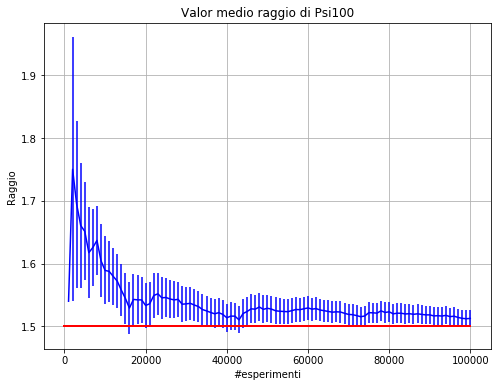

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 6]

x, y, error = np.loadtxt("ex05.1/Raggio100.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y,yerr=error ,fmt='blue')
plt.xlabel('#esperimenti')
plt.ylabel('Raggio')
plt.grid(True)
plt.title("Valor medio raggio di Psi100")
plt.plot([0, 100000], [1.5, 1.5], color='red', linestyle='-', linewidth=2)
plt.show()

Il valor medio di $r$ per lo stato fondamentale dell'atomo d'idrogeno $\Psi_{1,0,0}$ è compatibile con il valore di aspettazione $<r>=3/2$ all'aumentare del numero di esperimenti. Il tasso di accettazione è 0.50714. 

I 10000 punti che abbiamo riportato, risultano disposti secondo una simmetria sferica proprio come ci si aspettava.


#### $|\Psi_{2,1,0}(x,y,z)|^2$

Il primo stato eccitato, 2p , dell'atomo d'idrogeno è rappresentato dalle seguente funzione d'onda:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
In questo caso, partiamo dal punto $\vec{x_0}=(0,0,2.5)$ e usiamo $\delta=2.8$. Aspettiamo 100 steps prima di misurare il raggio per equilibrare il sistema.

Il valor medio di aspettazione di $r$ per lo stato eccitato $\psi_{2,1,0}$ è :
$$\langle r\rangle_{\Psi_{2,1,0}}= 5$$

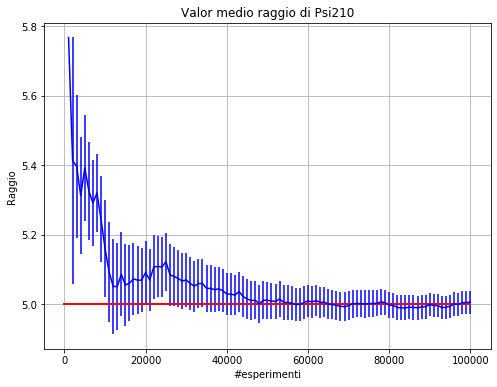

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 6]

x, y, error = np.loadtxt("ex05.1/Raggio210.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y,yerr=error ,fmt='blue')
plt.xlabel('#esperimenti')
plt.ylabel('Raggio')
plt.grid(True)
plt.title("Valor medio raggio di Psi210")
plt.plot([0, 100000], [5.0, 5.0], color='red', linestyle='-', linewidth=2)
plt.show()

Il valor medio di $r$ per il primo stato eccitato dell'atomo d'idrogeno $\Psi_{2,1,0}$ è compatibile con il valore di aspettazione $<r>=5$ all'aumentare di #esperimenti. Il tasso di accettazione è 0.52367

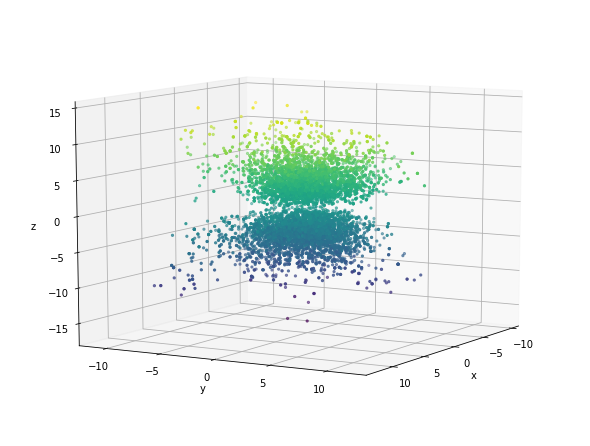

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X, Y, Z = np.loadtxt("ex05.1/Psi210.txt", usecols=(0,1,2), delimiter=' ', unpack='true', max_rows=10000)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

Dopo aver plottato i punti, nella figura sopra, abbiamo ottenuto la forma caratteristica dell'orbitale p.

Nota: L'accettazione dell'algoritmo Metropolis che abbiamo implementato per la distribuzione uniforme e gaussiana non cambia perchè , la distribuzione gaussiana , essendo simmetrica è indipendente dal trasferimento.